# Part I - Ford GoBike System Data exploration
## by Amen T. AJAMU

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# importing all needed the libraries and setting the plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#reading the csv file into a dataframe

df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#Overview of key properties of the dataset
print(df.shape)
print(df.info())
print(df.dtypes)

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None
dur

In [4]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [5]:
#dropping null values
df.dropna(inplace=True)

#inspecting to make sure that the null vales have been expunged
print(df.shape)

(174952, 16)


It can deduced that some of the bike users kept the bikes for 2 consecutive days. This will inform the techniques of data engineering that will be used when working with the datetime columns.

In addition, the minimum duration of time is 61seconds which is more than a minute. As such, the duration will be formatted to be measured in minutes.

In [6]:
#changing the unit of measuring the duration from seconds to minutes by creating a new column
df['duration'] = df['duration_sec'].apply(lambda x: x/60)

#dropping the old column
df.drop('duration_sec', axis =1, inplace = True)

In [7]:
#creating a new feature called "age" by subtracting all the birth years from 2019
df['age'] = df['member_birth_year'].apply(lambda x: 2019- x)

#dropping the old column
df.drop('member_birth_year', axis =1, inplace = True)

In [8]:
#creating a separate column for the month inwhich the bike was booked

df['start_month']= pd.to_datetime(df['start_time']).dt.month

df.start_month.value_counts()

2    174952
Name: start_month, dtype: int64

The above shows that all the ride were booked in 2nd month in 2019. As such, I will attempt to take a look at the distribution across the different days of the month

In [9]:
#creating a separate column for the day of week inwhich the bike was booked

df['start_day']= pd.to_datetime(df['start_time']).dt.dayofweek

df.start_day.value_counts()

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: start_day, dtype: int64

The output above shows that the days of the inwhich the bikes were booked is encoded in the numeric form. This shall be adjusted to make the visualization more intuitive.

In [10]:
#decoding the days of the week in which the bikes were booked

df['start_day'] = df['start_day'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',
                                          6:'Saturday'})
df.start_day.value_counts()

Wednesday    33712
Monday       30584
Tuesday      28426
Thursday     27663
Sunday       25641
Saturday     14512
Friday       14414
Name: start_day, dtype: int64

In [11]:
#Checking if some of the users kept the bike for more than a day using the largest duration.

max_duration = df.duration.max()

df[df['duration'] == max_duration]

start_time                  end_time  start_station_id  \
85465  2019-02-16 15:48:25.0290  2019-02-17 15:17:33.0800               3.0   

                                 start_station_name  start_station_latitude  \
85465  Powell St BART Station (Market St at 4th St)               37.786375   

       start_station_longitude  end_station_id      end_station_name  \
85465              -122.404904           368.0  Myrtle St at Polk St   

       end_station_latitude  end_station_longitude  bike_id   user_type  \
85465             37.785434            -122.419622     6301  Subscriber   

      member_gender bike_share_for_all_trip     duration   age  start_month  \
85465          Male                      No  1409.133333  38.0            2   

      start_day  
85465    Friday

### What is the structure of your dataset?

The dataset contains 174952 non-null entries of individual bike rides made on Ford GoBike's bike-sharing platfrom in the  greater San Francisco Bay area. The ratio of numeric to non-numeric features is almost equal, to make up a total of 16 features.

### What are the main features of interest in your dataset?

The duration for which the bikes were used and the bike IDs

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The type of the subscriber, the gender of the subcriber, destination of the users and the bike id

## Univariate Exploration

Starting with exploring the distribution of the main feature of interest, duration.

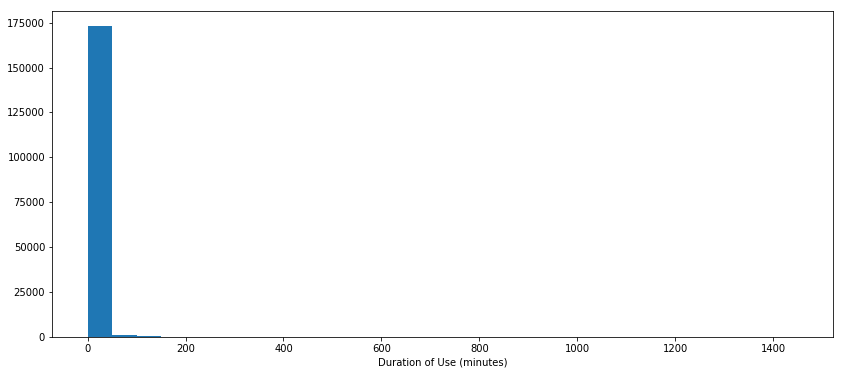

In [12]:
#checking the distribution of the duration of use

binsize = 50
bins = np.arange(0, df['duration'].max()+binsize, binsize)

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'duration', bins = bins)
plt.xlabel('Duration of Use (minutes)');

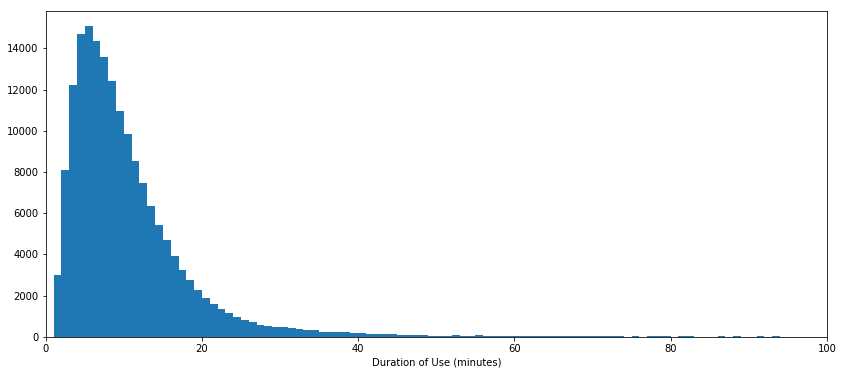

In [13]:
#checking the distribution of the duration of use while setting boundaries

binsize = 1
bins = np.arange(0, df['duration'].max()+binsize, binsize)

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'duration', bins = bins)
plt.xlabel('Duration of Use (minutes)')

#setting a boundary to leave out outrageous values
plt.xlim((0,100))
plt.show();

The distribution of duration above shows that the duration of use is skewed to the right, with a very long tail. As such, a logarithmic transformation of the x axis axis will be carried out for better exploration to find out if there are hidden insights.

In [14]:
np.log10(df['duration'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration, dtype: float64

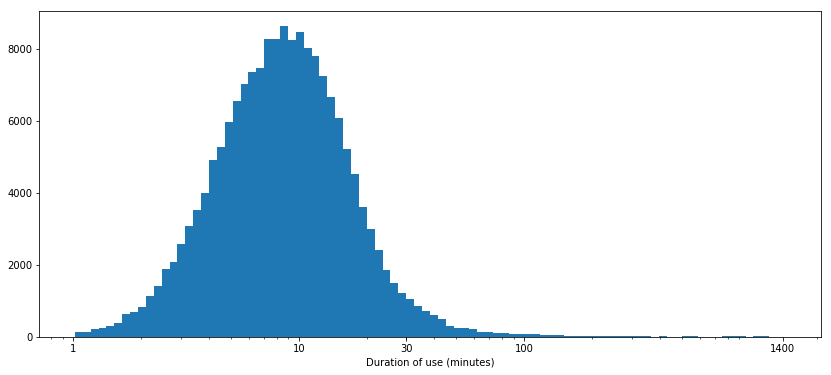

In [15]:
#putting this variable on a log  scale
log_binsize = 0.035
bins = 10 ** np.arange(0.007, np.log10(df['duration'].max())+log_binsize, log_binsize)
ticks = [1, 10, 30, 100, 1400]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Duration of use (minutes)')
plt.show();

Upon plotting the distribution of the duration of use on a log scale, the distribution was found to still be unimodal though someWhat normal with the peak somewhere around 10minutes. However, there still exists a long tail beyond 100minutes.

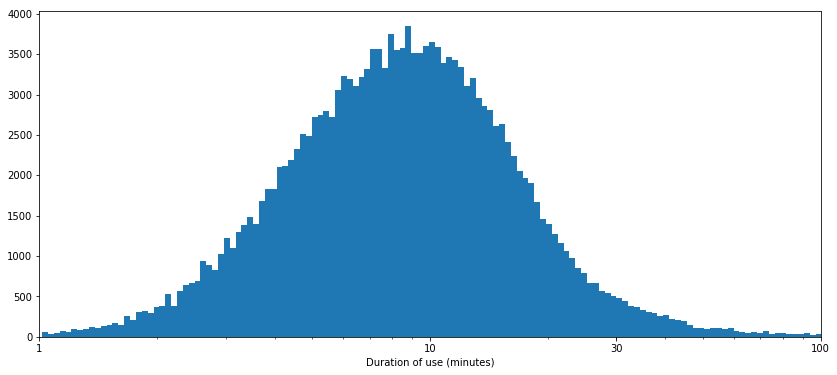

In [16]:
#putting this variable on a log  scale, then setting boundaries to strip off the long tail to the right.
log_binsize = 0.015
bins = 10 ** np.arange(0.007, np.log10(df['duration'].max())+log_binsize, log_binsize)
ticks = [1, 10, 30, 100, 1400]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Duration of use (minutes)')
plt.xlim((1,100))
plt.show();

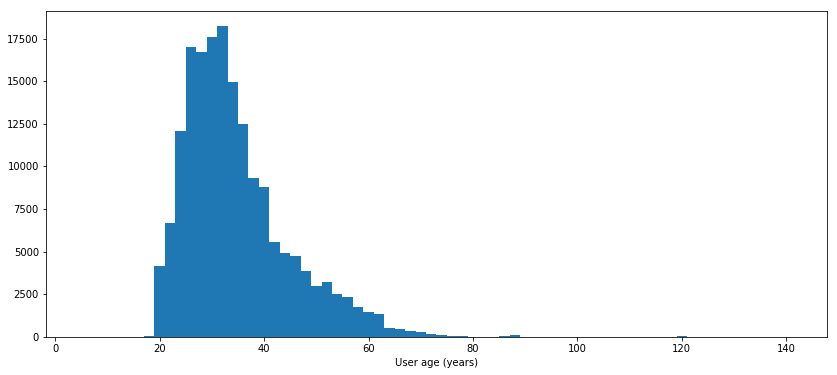

In [17]:
#checking the distribution of the age of the users

binsize = 2
bins = np.arange(5, df['age'].max()+binsize, binsize)

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('User age (years)');

There appears to be a long tail to the right beyond 80yeears of age and absolutely no values below age 20.

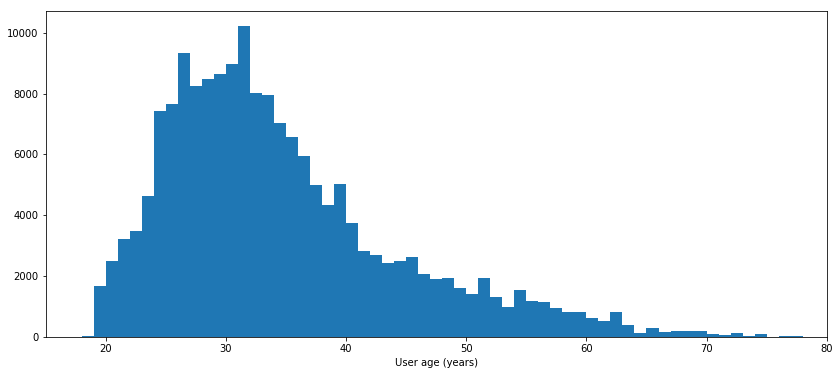

In [18]:
#Setting boundaries to shut out the outliers and to examine the distribution more accurately
binsize = 1
bins = np.arange(5, df['age'].max()+binsize, binsize)

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('User age (years)')
plt.xlim((15,80));

Though skewed to the right hand side, the peak of the distribution of age is somewhere around 35 years of age

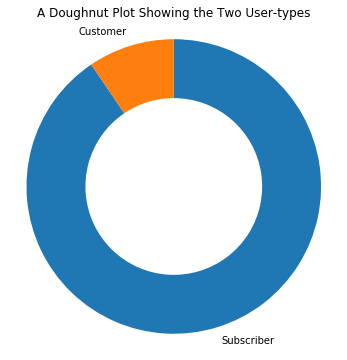

In [19]:
#making a plot of the user type

sorted_count = df.user_type.value_counts()
plt.figure(figsize = [14,6])
plt.pie(sorted_count, labels =sorted_count.index, startangle = 90, counterclock = False, wedgeprops = {"width":0.4})
plt.title('A Doughnut Plot Showing the Two User-types')
plt.axis('square');

The dough nut plot above shows that a significantly larger proportions of the users were subcribers

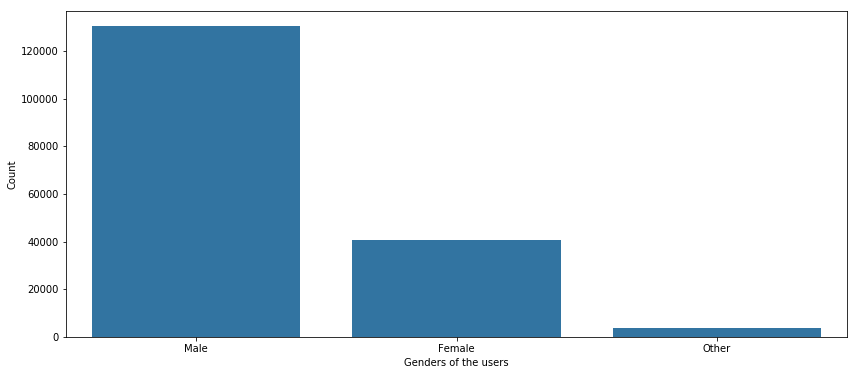

In [20]:
#Checking the distribution of the gender of the users

base_color = sb.color_palette()[0]
sorted_gender = df.member_gender.value_counts().index
#set the plot dimensions
plt.figure(figsize = [14,6])
sb.countplot(data=df, x='member_gender', color = base_color, order = sorted_gender)
plt.xlabel('Genders of the users')
plt.ylabel('Count');

In [21]:
day_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#changing start_day to an ordered categorical variable
df['start_day'] = pd.Categorical(df['start_day'], ordered = True, categories=day_order)

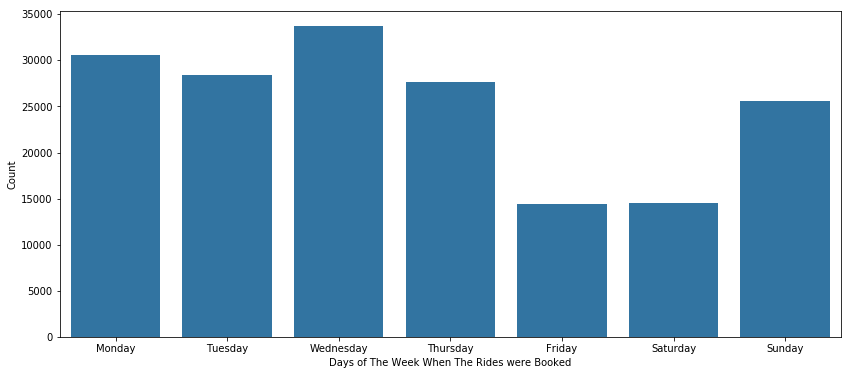

In [22]:
#Checking the distribution of the days of the week inwhich the rides were booked

base_color = sb.color_palette()[0]
#set plot dimensions
plt.figure(figsize = [14,6])

sb.countplot(data=df, x='start_day', color = base_color)
plt.xlabel('Days of The Week When The Rides were Booked')
plt.ylabel('Count');

In [23]:
#The 10 most popuar destinations for the users

fav_destination = df.end_station_name.value_counts()[:10]

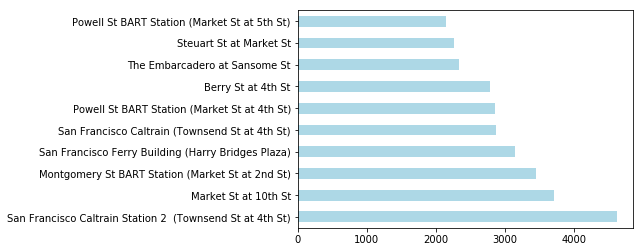

In [24]:
fav_destination.plot(kind = 'barh', color = 'lightblue');

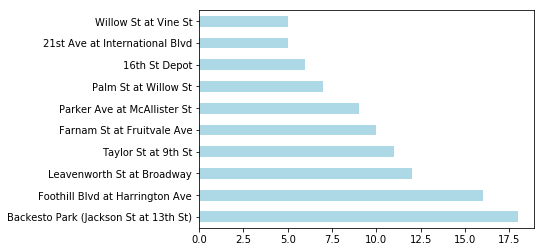

In [25]:
#The ten least favorite destinations

least_fav_destination = df.end_station_name.value_counts()[-10:]

least_fav_destination.plot(kind = 'barh', color = 'lightblue');

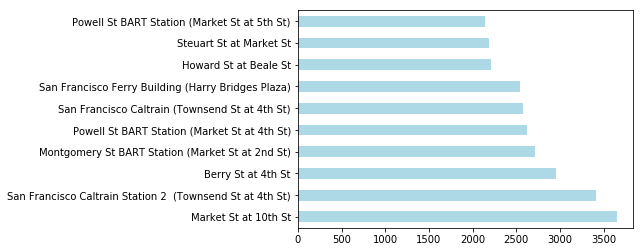

In [26]:
#The first 10 most popular start points
most_popularstart_station_name = df.start_station_name.value_counts()[:10]

most_popularstart_station_name.plot(kind = 'barh', color = 'lightblue');

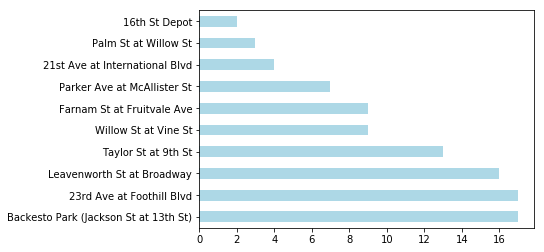

In [27]:
#The 10 least popular start points
least_popularstart_station_name = df.start_station_name.value_counts()[-10:]

least_popularstart_station_name.plot(kind = 'barh', color = 'lightblue');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The duration of use of the bikes was found to be normally distributed around a mean approximately equal to 10minutes.
- The majority of those who used the platform were between ages 30 and 40.
- In addition to these, the users were mostly subscribers while male users makde up the largest proportion of users
- The visualizations above show that the bikes were least used on weekends, but used mostly on the first three days of the week.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I transformed the duration of use using the log scale. I did this to be able to have a better idea of the pattern of distribution.
- Also, I created a new column into which the day of week  when the platform was used was extracted. Furthermore, I decoded all the numeric value to be able to get a more intuitive insight.

## Bivariate Exploration

In this section, I am going to examine the relationships between the different variables. Firstly, I am going to group my variable into two; categorical and numeric.

In [28]:
num_var = ['duration', 'age', 'bike_id', 'end_station_id', 'start_station_id']
cat_var = ['start_day', 'member_gender', 'user_type']

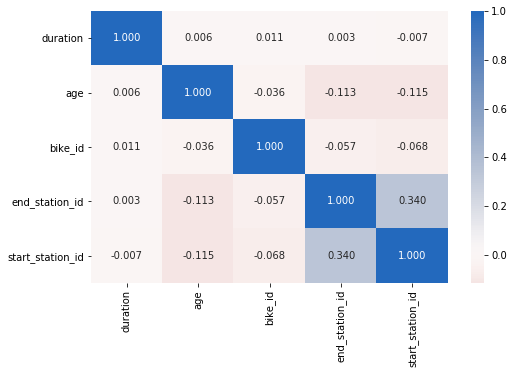

In [29]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

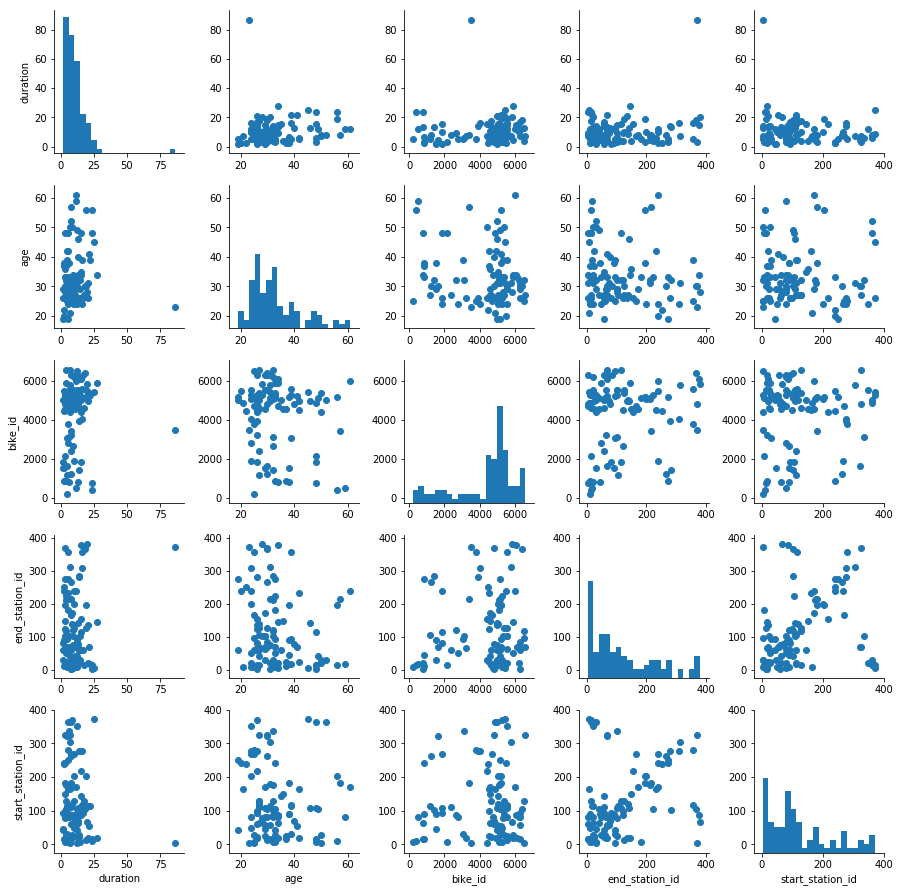

In [30]:
# plot matrix: sample 100 entries so that plots are clearer and they render faster
df_samp = df.sample(n=100, replace = False)

g = sb.PairGrid(data = df_samp, vars = num_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There is relationship between the users' take-off point and their destination. Furthermore, there is also a relationship between the bikes' id and the users' destination. This suggest that some of bike are used on almost definite and precise routes. The relationship between the bike_id and end_station is going to be visualized again using a larger sample size.

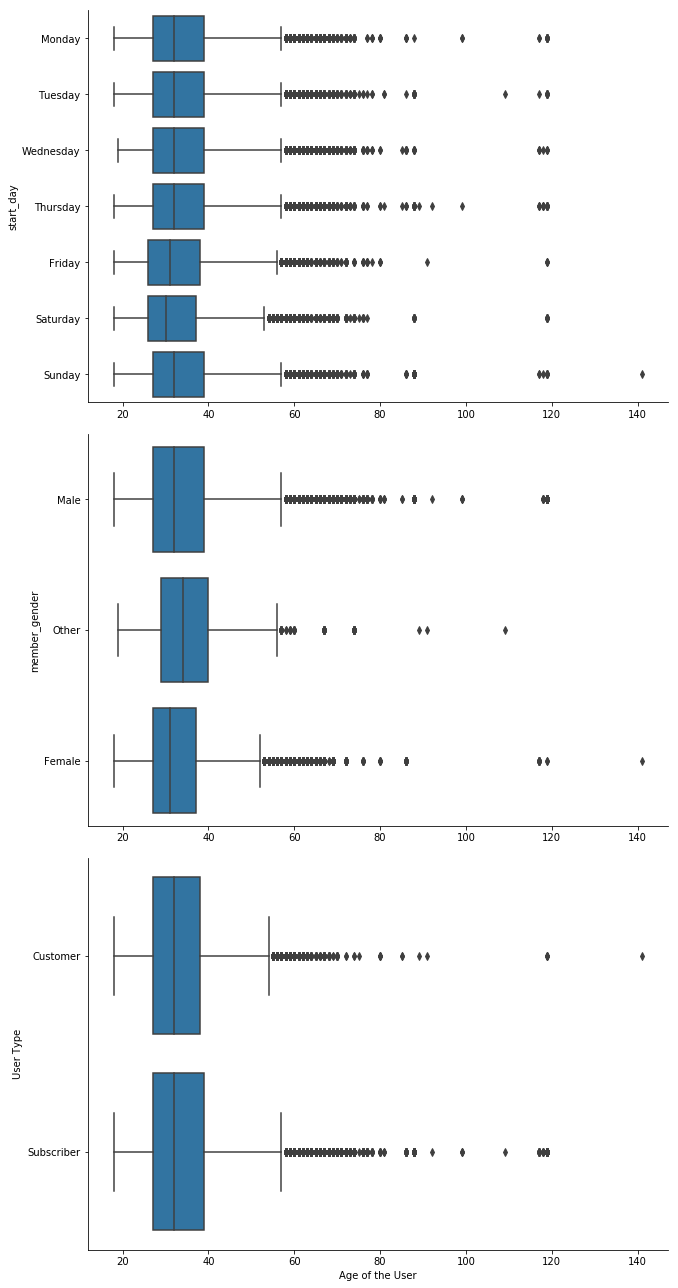

In [31]:
#plotting the age of the users against the categorical features


def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [12, 12])
g = sb.PairGrid(data = df, y_vars = cat_var , x_vars = ['age'],
                size = 6, aspect = 1.5)
g.map(boxgrid)
plt.ylabel('User Type')
plt.xlabel('Age of the User')
plt.show();

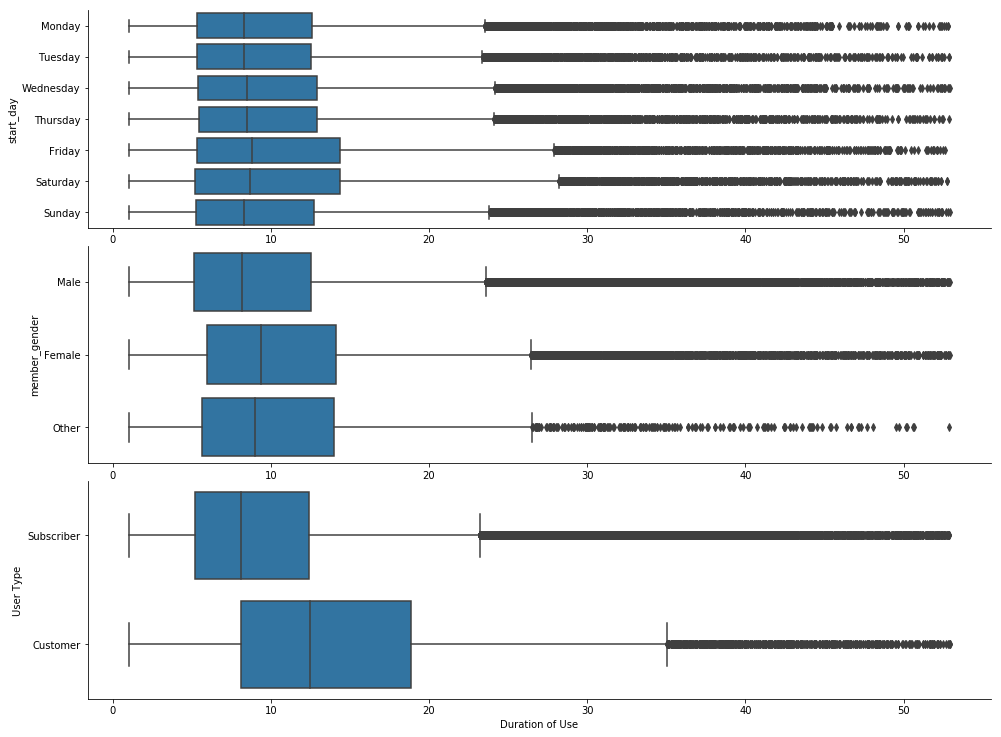

In [32]:
#plotting the duration of the use of the bikes against the categorical features

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

g = sb.PairGrid(data = df.query('duration<duration.quantile(0.99)'), y_vars = cat_var , x_vars = 'duration',
                size = 6, aspect = 1.5)
g.map(boxgrid)
plt.ylabel('User Type')
plt.xlabel('Duration of Use')
g.fig.set_size_inches(14,10);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Surprisingly, I did not observe any key relationship between the users' age and their duration of use of Ford's GoBike service. However, users during the weekend (Sunday and Monday), subcribers and females were found to be the youngest of the whole lot. A rather unexpected, but interesting discovery is that a larger proportion of subcribers used the bikes for a lesser duration of time than customers. Nonetheless, the user who used the bike for the longest duration of time is a male subcriber who hired the bike on a thursday.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a correlation between the start station id and the users' destination. This posits that these users have a definite and repititive route on which they use the bike service.

## Multivariate Exploration

Here, I am going to visualize the interactions between start station and end station while using user type as the non-postionally encoded third variable

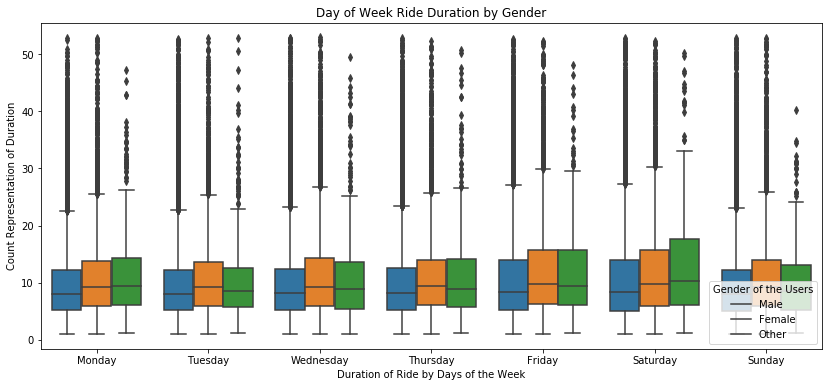

In [36]:
#checking days of week duration for which the rides were booked by gender
base_color = sb.color_palette()[0]
#set plot dimensions
plt.figure(figsize=[14,6])
sb.boxplot(data = df.query('duration<duration.quantile(0.99)'), x = 'start_day' , y = 'duration', hue = 'member_gender')
plt.xlabel('Duration of Ride by Days of the Week')
plt.ylabel('Count Representation of Duration')
plt.legend(['Male', 'Female', 'Other'], title= 'Gender of the Users')
plt.title('Day of Week Ride Duration by Gender');

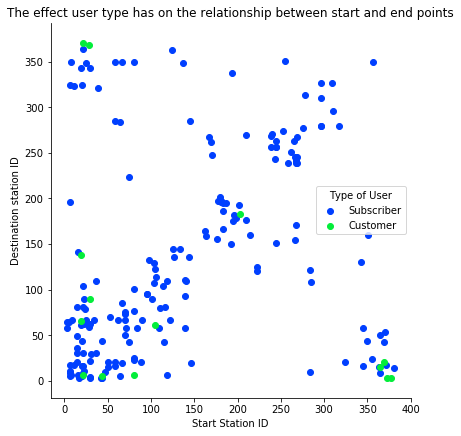

In [34]:
#checking what effect user type has on the relationship between start and end points
df_samp = df.sample(n=200, replace = False)
g = sb.FacetGrid(data = df_samp, hue = 'user_type', size = 6, palette = 'bright')
g.map(plt.scatter, 'start_station_id', 'end_station_id')
g.set_xlabels('Start Station ID')
g.set_ylabels('Destination station ID')
plt.title("The effect user type has on the relationship between start and end points")
plt.legend(['Subscriber','Customer'], title = 'Type of User');

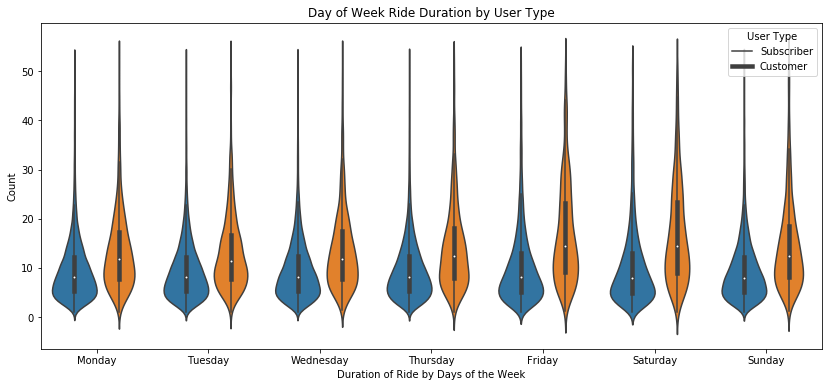

In [35]:
#checking days of week duration for which the rides were booked by user type
base_color = sb.color_palette()[0]
#set plot dimensions
plt.figure(figsize=[14,6])
sb.violinplot(data = df.query('duration<duration.quantile(0.99)'), x = 'start_day' , y = 'duration', hue = 'user_type')
plt.xlabel('Duration of Ride by Days of the Week')
plt.ylabel('Count')
plt.legend(['Subscriber', 'Customer'], title= 'User Type')
plt.title('Day of Week Ride Duration by User Type');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the plot above, it appears the customers seem to have a definite route more than the subcribers. This is expected because subcribers are likelier to use the bike in a more arbitrary manner than periodic users.

### Were there any interesting or surprising interactions between features?

The effect that the user type has on the plot is not exactly surprising. It is expected that subricribers are likelier to be the more natural users of the bike than the other type of users. As such, routes customers use is likelier to be more defined than that which subscribers use. Interestingly, more than half of those who identified as male used the bike system for the least duration of time consistently for all the days of the week.

## Conclusions
The majority of the bike users on this bike sharing platform identified as male. This is consistent with the general social construct. It was also observered that the bike sharing platform is not popular among older adults. Surprisingly, I did not observe any key relationship between the users' age and their duration of use of Ford's GoBike service. However, users during the weekend (Sunday and Monday), subcribers and females were found to be the youngest of the whole lot. A rather unexpected, but interesting discovery is that a larger proportion of subcribers used the bikes for a lesser duration of time than customers. Nonetheless, the user who used the bike for the longest duration of time is a male subcriber who hired the bike on a thursday.
